# Introduction 

The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

# Gathering Data

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import tweepy as tw
import json 
import matplotlib.pyplot as plt
%matplotlib inline

<div> <b> twitter-archive-enhanced.csv </b> </div>
The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [2]:
#Importing file 
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<div> <b> image_predictions.tsv </b> </div>
This file contains the tweet image predictions. Downloaded it from the link that Udacity offered <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"> HERE </a>

In [3]:
df_predict = pd.read_csv('image-predictions.tsv', sep='\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<div> <b> Download Tweet JSON Data </b> </div>
Query the Twitter API using Python Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive.
<div> <b>Authentication: To begin the process we need to register our client application with Twitter. </b> </div>


In [5]:

auth = tw.OAuthHandler('xxxx', 'xxxx')
auth.set_access_token('xxxx', 'xxxx')
api = tw.API(auth, 
                 parser = tw.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

<div> <b> Download tweets we search about </b> </div>


In [14]:
tweet_ids = list(df_twitter['tweet_id'])
tweets = []
not_found_tweets = [] # Tweets that can't be found are saved in the list below:
tweets_id_list =[]
for tweet_id in tweet_ids:   
    try:
        tweets.append(api.get_status(tweet_id)) #Returns a single status specified by the tweeet ID parameter.
        tweets_id_list.append(tweet_id)
    except Exception as e:
        not_found_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 417
Rate limit reached. Sleeping for: 381


In [15]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#Getting Numer of tweets
print(len(tweets)+len(not_found_tweets)==2356)

True


In [17]:
# Write tweet data to json file
with open('json.txt', mode = 'w') as file:
    json.dump(tweets, file)

In [28]:
temp_list = []
with open('json.txt', encoding='utf-8') as file:  
    file_data = json.load(file)
    for i in file_data:
        tweet_id = i['id']
        tweet_contents = i['text']
        only_url = tweet_contents[tweet_contents.find('https'):]
        favorite_count = i['favorite_count']
        retweet_count = i['retweet_count']
        n=0
        retweeted_status = i['retweeted_status'] = i.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet': #Making sure now all tweets are Original from WeRateDogs
            url = only_url
            n=n+1
            
        if n==1:
            temp_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'retweeted_status':str(retweeted_status)})
        
        df_json = pd.DataFrame(temp_list, columns = ['tweet_id', 'favorite_count','retweet_count','retweeted_status'])

In [29]:
df_json.head()
#So, now we have df_twitter, df_predict and df_json

,tweet_id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,35908,7625,Original tweet
1,892177421306343426,30982,5644,Original tweet
2,891815181378084864,23309,3736,Original tweet
3,891689557279858688,39187,7790,Original tweet
4,891327558926688256,37440,8392,Original tweet


# Assessing Data

<h3> Twitter Archive Enhanced </h3>

In [30]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [31]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<b> The info() method reveals several quality and tidiness issues: </b>

<ul>
  <li>There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)  </li>
  <li>There are 78 replies (in_reply_to_status_id, in_reply_to_user_id) </li>
  <li>There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data </li>
  <li>The timestamp field is in string format (object) </li>
  <li>There are 4 columns for dog stages (doggo, floofer, pupper, puppo) </li>

</ul>


In [32]:
df_twitter.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
790,773922284943896577,NaN,NaN,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
322,834167344700198914,NaN,NaN,2017-02-21 22:26:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834167344...,11,10,Sunshine,None,None,None,None
2252,667801013445750784,NaN,NaN,2015-11-20 20:25:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10 https://t.co/SVMF4Frf1w,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667801013...,12,10,None,None,None,None,None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,None,None,pupper,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Mason. He's a total frat boy. Pretends to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601...,10,10,Mason,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None


<div> <b> Quality problems : </b> Names like "a" "the" and None </div>
<b> Tidiness : </b>
Columns with object datatype on the left and numerical columns on the right



In [33]:
#CHECK FOR NULLS 
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [34]:
#Check for duplicated tweets id in Archive twitter file
df_twitter.duplicated().sum(), df_twitter['tweet_id'].duplicated().sum()

(0, 0)

The head() and tail() methods show us several issues:

Quality:

The timestamp column has dates in string form.
Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
Values of "None" in the name column.
Tidiness:

The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

In [35]:
df_twitter[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [36]:
a= sum(df_twitter.rating_denominator != 10)
print("Number of rating denominator not equal to 10 is : ", a)

Number of rating denominator not equal to 10 is :  23


<b> Quality issues: </b>
<div> <ul> 
    <li> The max values are huge: 1776, 170. </li>
    <li> The minimum is 0 for both. </li>
    <li> Denominator is not 10 about 23 times </li>

In [37]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<b> Quality issues: 4 Types of sources</b>
<div> <ul> 
    <li> Vine - Make a Scene </li>
    <li> Twitter for iPhone </li>
    <li> Twitter Web Client </li>
    <li> TweetDeck </li> </ul>



In [38]:
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
df_twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
df_twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
df_twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<b> knowing numbers of dogs .. then create a dogs stage in Cleaning phase </b>

<h3> Prediction Archive </h3>

In [42]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
df_predict.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
477,675166823650848770,https://pbs.twimg.com/media/CV6spB7XAAIpMyP.jpg,1,llama,0.284394,False,standard_poodle,0.132569,True,teddy,0.127975,False
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,1,golden_retriever,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True
2024,881666595344535552,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,1,Saluki,0.529012,True,Afghan_hound,0.250003,True,golden_retriever,0.160739,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
1570,794926597468000259,https://pbs.twimg.com/media/CwglhZVXgAAc3_w.jpg,1,teddy,0.569566,False,bath_towel,0.173745,False,toy_poodle,0.037662,True
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True


<b> The info() method reveals several quality and tidiness issues: </b>

<ul>
  
  <li>Some cases there are two or more possibility to predict the dog </li>

</ul>


In [45]:
df_predict.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
df_predict.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [47]:
df_predict.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [48]:
#CHECK FOR NULLS 
df_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [49]:
#Check for duplicated rows
df_predict.duplicated().sum()

0

<h3> Json file </h3>

In [50]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 4 columns):
tweet_id            2168 non-null object
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
retweeted_status    2168 non-null object
dtypes: int64(2), object(2)
memory usage: 67.9+ KB


In [51]:
df_json.describe()

,favorite_count,retweet_count
count,2168.000000,2168.000000
mean,8064.524446,2423.065498
std,11882.757636,4310.552304
min,50.000000,1.000000
25%,1710.500000,522.000000
50%,3643.500000,1155.000000
75%,10014.500000,2745.250000
max,154851.000000,76928.000000


In [52]:
df_json.sample(15)

,tweet_id,favorite_count,retweet_count,retweeted_status
1035,714631576617938945,3223,979,Original tweet
147,859074603037188101,32313,12836,Original tweet
1531,680206703334408192,2791,1145,Original tweet
1938,670374371102445568,717,252,Original tweet
1102,708356463048204288,3532,1293,Original tweet
764,752682090207055872,5979,1583,Original tweet
478,799757965289017345,8504,2199,Original tweet
1750,673956914389192708,1874,909,Original tweet
1821,672264251789176834,1088,319,Original tweet
1101,708400866336894977,15755,9895,Original tweet


# Assessing Summary
   <h2 style="color:Navy;"> 1- Twitter Enhanced Archive </h2> 
<h3> Quality problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).  </p> </li>
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).  </p> </li>
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 2331 tweets found indicating 25 tweets not found   </p> </li>
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            The timestamp column is in string format.  </p> </li>
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 775 tweets with the dog name as "None". </p> </li>
    <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 23 denominator values not equal to 10  </p> </li>
    <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are only 4 types of values in the source column </p> </li>
    
   </ol>

<h3> Tidiness problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            There are 4 columns for dog stages (doggo, floofer, pupper, puppo). do not follow Tidiness rules.  </p> </li>
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            No need for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. We need only Original tweets  </p> </li>
        
   </ol>
   
  <h2 style="color:Navy;"> 2- Image Prediction Archive </h2>
<h3> Quality problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
              There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".  </p> </li>
        
   </ol>

<h3> Tidiness problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            The df_predict table should be combined with the archive table.</p> </li>
        
   </ol>
    
    
  <h2 style="color:Navy;"> 3- Json data </h2>
<h3> Quality problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
              duplicated tweets id.  </p> </li>
        
   </ol>

<h3> Tidiness problems: </h3>
    <ol> 
        <li> <p style="background-color:rgb(141, 190, 106) ;">
            The df_json table should be combined with the archive table.</p> </li>
        
   </ol>
    

# Cleaning Data

In [53]:
## CLEANING DATA
##
##
##
df_twitter_clean = df_twitter.copy()
df_predict_clean = df_predict.copy()
df_json_clean = df_json.copy()

<b> Coverting timestamp to DateTime we can extract data from it </b>


In [54]:
# CODE
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

In [55]:
#TEST
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [56]:
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [57]:
df_twitter_clean.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [58]:
df_twitter_clean.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

<b> Delete un-used columns  </b>

In [61]:
#CODE
df_twitter_clean = df_twitter_clean[['tweet_id','timestamp','text', 'rating_numerator', 
                                     'rating_denominator', 'name', 'doggo','floofer', 'pupper', 'puppo']]


In [63]:
#TEST
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 184.2+ KB


<b> Dogs stage counts </b>

In [64]:
df_twitter_clean.pupper.value_counts(),df_twitter_clean.puppo.value_counts(),df_twitter_clean.floofer.value_counts()

(None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64)

In [65]:
#CODE
df_twitter_clean.duplicated().sum() #Need to remove duplicated tweets

0

In [66]:
#TEST
# Keeping one tweet that represents all duplicates 
df_twitter_clean = df_twitter_clean.drop_duplicates(subset='tweet_id', keep='last')
df_twitter_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


<b> Gathering and Melting dogs type into one column </b>


In [67]:
#CODE
#then dropping doggo|floofer|pupper|puppo
dog_stage=[]
dog_stage= df_twitter_clean['text'].str.extract('(floofer|doggo|pupper|puppo)')
df_twitter_clean['dogs_stage']= dog_stage
df_twitter_clean = df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], 1)
#TEST
df_twitter_clean.sample(15)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
2070,671122204919246848,2015-11-30 00:22:57+00:00,Two miniature golden retrievers here. Webbed p...,4,10,None,NaN
721,783334639985389568,2016-10-04 15:55:06+00:00,This is Dave. He's currently in a predicament....,12,10,Dave,NaN
615,796563435802726400,2016-11-10 04:01:37+00:00,RT @dog_rates: I want to finally rate this ico...,13,10,None,puppo
2228,668256321989451776,2015-11-22 02:34:57+00:00,This is Jareld. Jareld rules these waters. Lad...,13,10,Jareld,NaN
2311,666781792255496192,2015-11-18 00:55:42+00:00,This is a purebred Bacardi named Octaviath. Ca...,10,10,a,NaN
905,758099635764359168,2016-07-27 00:40:12+00:00,In case you haven't seen the most dramatic sne...,13,10,None,NaN
1784,677662372920729601,2015-12-18 01:31:14+00:00,In honor of the new Star Wars movie. Here's Yo...,12,10,None,NaN
2173,669324657376567296,2015-11-25 01:20:08+00:00,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,11,10,Ralf,NaN
2205,668633411083464705,2015-11-23 03:33:22+00:00,This is Churlie. He likes bagels. 10/10 https:...,10,10,Churlie,NaN
1580,687127927494963200,2016-01-13 04:23:58+00:00,Meet Gordon. He's an asshole. 9/10 would still...,9,10,Gordon,NaN


In [68]:
df_twitter_clean.dogs_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dogs_stage, dtype: int64

 <b> Making a new rating column that express the total rating </b>


In [69]:
#CODE
num= df_twitter_clean['rating_numerator']
den= df_twitter_clean['rating_denominator']
df_twitter_clean['rating_total'] = 10 * num/den
#TEST
df_twitter_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,rating_total
1792,677334615166730240,2015-12-17 03:48:51+00:00,This dog gave up mid jump. 9/10 https://t.co/K...,9,10,None,NaN,9.0
1542,689599056876867584,2016-01-20 00:03:21+00:00,Here we see 33 dogs posing for a picture. All ...,11,10,None,NaN,11.0
2183,668989615043424256,2015-11-24 03:08:48+00:00,This is Bernie. He's taking his Halloween cost...,3,10,Bernie,NaN,3.0
1374,701952816642965504,2016-02-23 02:12:47+00:00,Meet Rilo. He's a Northern Curly Ticonderoga. ...,11,10,Rilo,NaN,11.0
1549,689255633275777024,2016-01-19 01:18:43+00:00,This is Ferg. He swallowed a chainsaw. 1 like ...,10,10,Ferg,NaN,10.0
569,801958328846974976,2016-11-25 01:18:59+00:00,This is Ronnie. He hopes you're having a great...,12,10,Ronnie,NaN,12.0
1737,679530280114372609,2015-12-23 05:13:38+00:00,Guys this really needs to stop. We've been ove...,7,10,a,NaN,7.0
24,887343217045368832,2017-07-18 16:08:03+00:00,You may not have known you needed to see this ...,13,10,None,NaN,13.0
1671,682393905736888321,2015-12-31 02:52:40+00:00,This is Kreg. He's riding an invisible jet ski...,11,10,Kreg,NaN,11.0
670,789986466051088384,2016-10-23 00:27:05+00:00,This is Happy. He's a bathtub reviewer. Seems ...,12,10,Happy,NaN,12.0


In [70]:
df_twitter_clean['rating_total']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_total, Length: 2356, dtype: float64

In [71]:
df_twitter_clean.duplicated().sum()

0

In [72]:
df_predict_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [73]:
df_predict_clean.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
rain_barrel              1
bearskin                 1
Scotch_terrier           1
American_black_bear      1
ocarina                  1
Name: p1, Length: 378, dtype: int64

In [74]:
df_predict_clean.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [76]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
#CODE
#Delete columns that won't benefit us
df_predict_clean = df_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf'
                                          ,'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#TEST
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [78]:
df_predict_clean['jpg_url'].duplicated().sum()

66

In [79]:
# Keeping one tweet that represents all duplicates 
df_predict_clean = df_predict_clean.drop_duplicates(subset='jpg_url', keep='last')

In [80]:
#Checing again
df_predict_clean['jpg_url'].duplicated().sum()

0

In [81]:
df_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

<b>  Gathering just ORIGINAL TWEETS OF WeRateDogs </b>


In [83]:
#Did above while turning json file to DF

<b>First Merge: Twitter archive enhanced with Image prediction dataframes </b>

In [84]:
#CODE
## Now we need to merge 3 dataframes together in one dataframe to make insights from it 
df_twitter_merge1 = pd.merge(df_twitter_clean, 
                      df_predict_clean, 
                      how = 'left', on = ['tweet_id'])
#TEST
df_twitter_merge1.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,rating_total,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


REMOVING JGP_URL NULLS 

In [85]:
#CODE
df_twitter_merge1['jpg_url'].isnull().sum() # Checking on nulls that may occur according to merging

347

In [86]:
#CODE_2
df_twitter_merge1 = df_twitter_merge1[df_twitter_merge1['jpg_url'].notnull()]
#TEST
df_twitter_merge1['jpg_url'].isnull().sum() # Checking again

0

In [87]:

df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 4 columns):
tweet_id            2168 non-null object
favorite_count      2168 non-null int64
retweet_count       2168 non-null int64
retweeted_status    2168 non-null object
dtypes: int64(2), object(2)
memory usage: 84.7+ KB


In [88]:
df_twitter_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2009 non-null int64
timestamp             2009 non-null datetime64[ns, UTC]
text                  2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
dogs_stage            329 non-null object
rating_total          2009 non-null float64
jpg_url               2009 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 157.0+ KB


<b>Turning out tweet id of first merge to string to apply second merge with json file,  </b>
cause it has tweet_id datatype object

In [89]:
#Noticing that tweet_id columns are object and int64 
# So, let's try converting
#CODE
df_twitter_merge1['tweet_id']=df_twitter_merge1['tweet_id'].apply(str)
#TEST
df_twitter_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns, UTC]
text                  2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
dogs_stage            329 non-null object
rating_total          2009 non-null float64
jpg_url               2009 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 157.0+ KB


In [90]:
df_twitter_merge1['rating_total']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_total, Length: 2009, dtype: float64

<b>Second Merge: First merge and Json dataframes </b>

In [91]:
#Merging json dataframe with the first merged dataframe
# On here to avid redundancy of two columns, just take the mutual tweet_id column 
#CODE
df_twitter_merge2 = pd.merge(df_twitter_merge1, df_json_clean, how = 'left', on = ['tweet_id']) 


In [92]:
#TEST
df_twitter_merge2.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,rating_total,jpg_url,favorite_count,retweet_count,retweeted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35908.0,7625.0,Original tweet
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30982.0,5644.0,Original tweet
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23309.0,3736.0,Original tweet
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,39187.0,7790.0,Original tweet
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37440.0,8392.0,Original tweet


In [93]:
#TEST
df_twitter_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 12 columns):
tweet_id              2009 non-null object
timestamp             2009 non-null datetime64[ns, UTC]
text                  2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
dogs_stage            329 non-null object
rating_total          2009 non-null float64
jpg_url               2009 non-null object
favorite_count        1922 non-null float64
retweet_count         1922 non-null float64
retweeted_status      1922 non-null object
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(6)
memory usage: 204.0+ KB


In [94]:
df_twitter_merge2['tweet_id'].duplicated().sum() # Checking if there is any duplication again 

0

# Storing, Analyzing, and Visualizing Data

<b> Store the reuslt in CSV file as required </b>

In [95]:
df_twitter_merge2.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<h3> Insights and visualizations </h3>
<b> 1- relation between how people love and share it  </b>

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

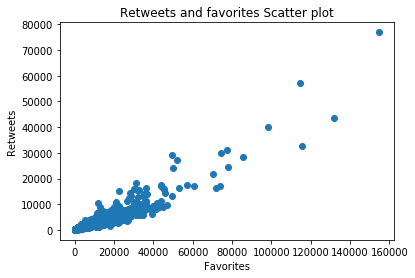

In [96]:

plt.scatter(df_twitter_merge2['favorite_count'], df_twitter_merge2['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

<b> 2- Number of ratings bar plot  </b>

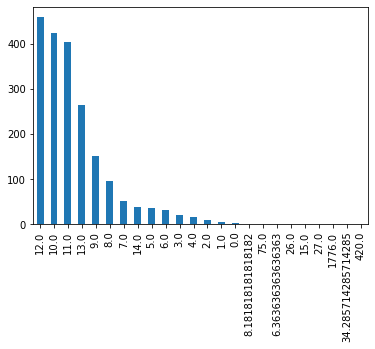

In [97]:

df_twitter_merge2.rating_total.value_counts().plot(kind='bar');

In [98]:
df_twitter_merge2['dogs_stage'].value_counts()

pupper     226
doggo       72
puppo       28
floofer      3
Name: dogs_stage, dtype: int64

<b> 3- Dogs stage pie plot </b>

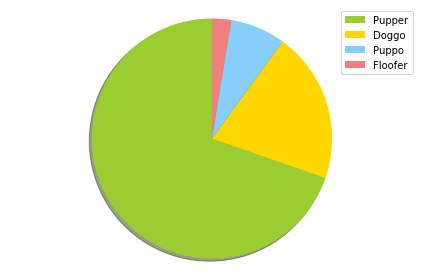

In [99]:

import matplotlib.pyplot as plt

labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
sizes = [216,63,23,8]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

<b> 4- Correlation map </b>

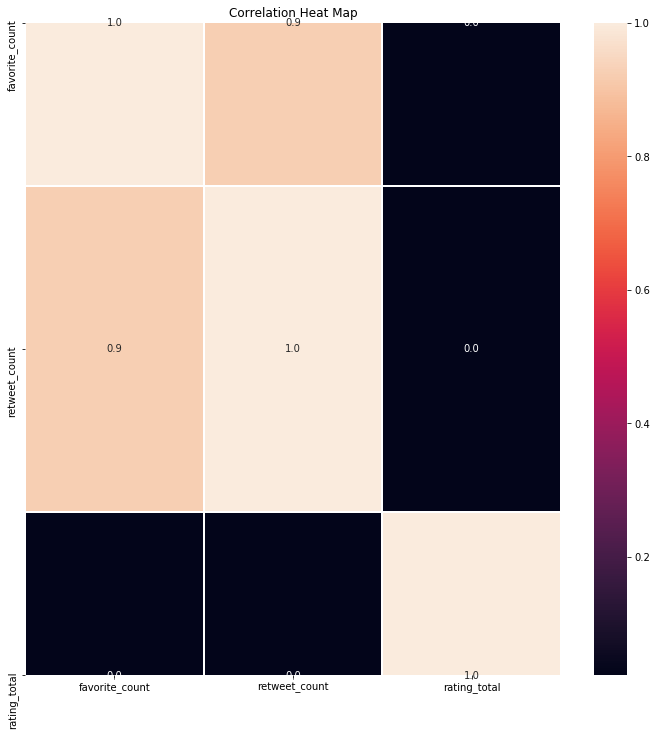

In [101]:

import seaborn

f,ax = plt.subplots(figsize=(12,12))
seaborn.heatmap(df_twitter_merge2[['favorite_count', 'retweet_count',
                                           'retweeted_status', 'rating_total']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

<b> 5- Histogram of all int64 columns  </b> 

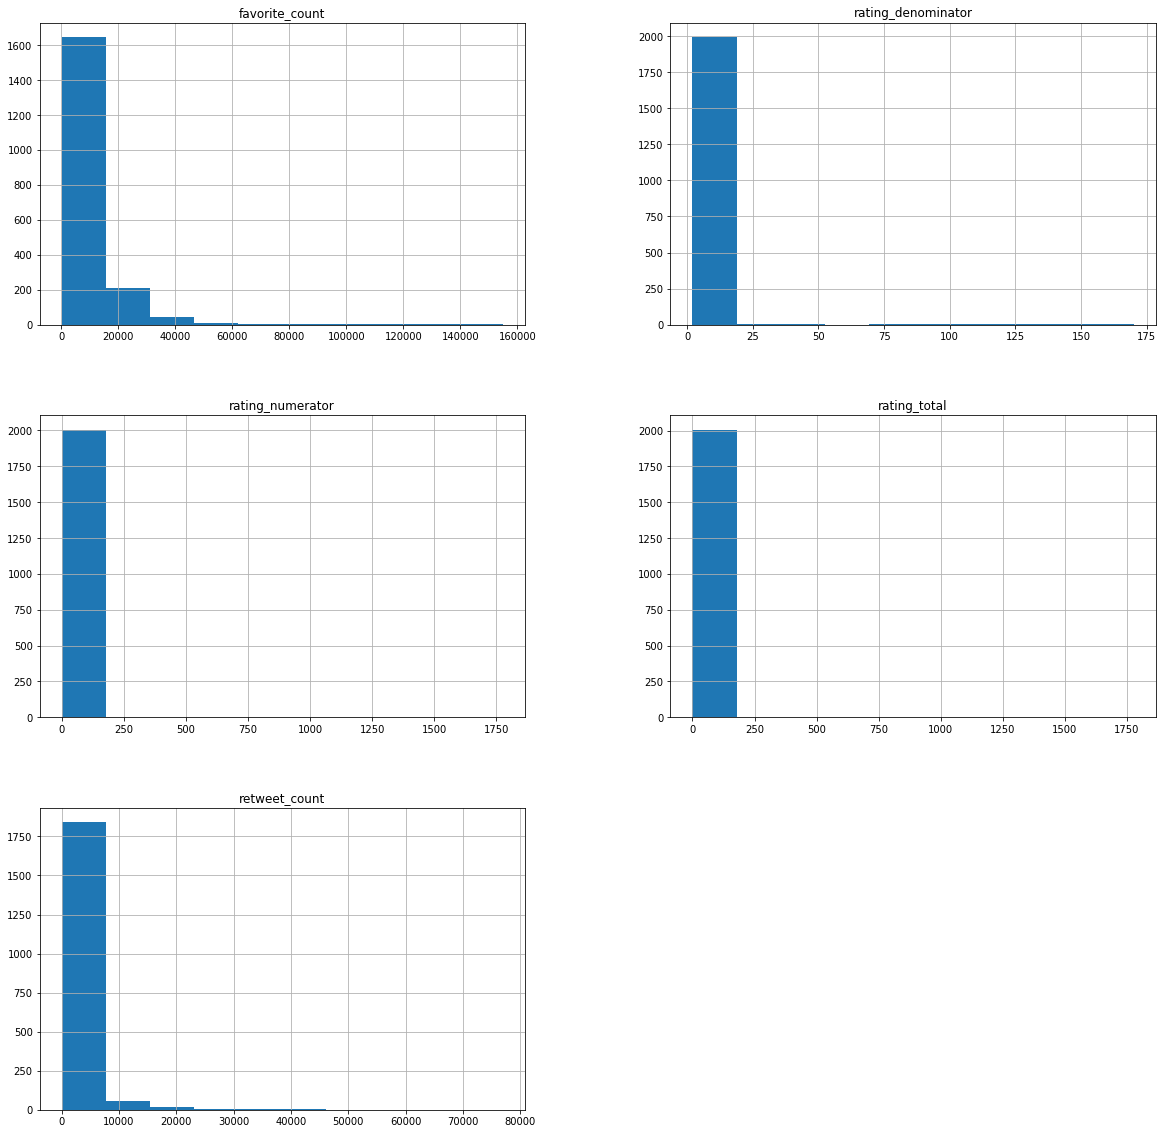

In [102]:
df_twitter_merge2.hist(figsize=(20,20));